<a href="https://colab.research.google.com/github/RajBhadani/Projects-Data_Science_and_Analytics/blob/main/E_Commerce_Data_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Project Overview**
**Problem Statement:**
E-commerce platforms need insights into which products and users are driving revenue.

**Objective:**
Analyze sales and user data to derive actionable business insights.

# Loading the Dataset

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [ ]:
# 1. Load CSVs
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv', parse_dates=['review_creation_date'], encoding='latin1', engine='python', on_bad_lines='skip')

# 2. Merge data: orders + items
df = pd.merge(items, orders[['order_id','customer_id','order_purchase_timestamp']], on='order_id', how='left')
# Add product info
df = pd.merge(df, products[['product_id','product_category_name']], on='product_id', how='left')
# Add review info
df = pd.merge(df, reviews[['order_id','review_score']], on='order_id', how='left')
# Add customer info if needed
df = pd.merge(df, customers[['customer_id','customer_unique_id']], on='customer_id', how='left')

# Quick preview
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,product_category_name,review_score,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,NaN,NaT,cool_stuff,5.0,NaN
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,NaN,NaT,pet_shop,NaN,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,moveis_decoracao,5.0,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,NaN,NaT,perfumaria,4.0,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,ferramentas_jardim,5.0,64b576fb70d441e8f1b2d7d446e483c5


In [ ]:
file_path = 'olist_order_reviews_dataset.csv'
with open(file_path, 'r', encoding='latin-1') as f:
    for i, line in enumerate(f):
        if i == 7174: # Line numbers are 0-indexed
            print(f"Line 7175: {line}")
            break

Line 7175: "d055ea9c92d349c374b618621e295f52","d046c8b9f07a115ce6faaa802666cea3",5,,,2018-03-15 00:00:00,2018-03-26 11:55:54



# **Data Preprocessing**

In [ ]:
df.describe()

,order_item_id,price,freight_value,order_purchase_timestamp,review_score
count,113050.000000,113050.000000,113050.000000,13331,87863.000000
mean,1.197904,120.546776,19.982808,2018-01-01 16:16:28.345510656,4.035840
min,1.000000,0.850000,0.000000,2016-09-04 21:15:19,1.000000
25%,1.000000,39.900000,13.080000,2017-09-14 08:24:46.500000,4.000000
50%,1.000000,74.900000,16.260000,2018-01-20 18:42:07,5.000000
75%,1.000000,134.900000,21.150000,2018-05-06 14:03:16.500000,5.000000
max,21.000000,6735.000000,409.680000,2018-08-29 10:22:35,5.000000
std,0.704656,183.420123,15.791302,NaN,1.385563


In [ ]:
df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,99719
order_purchase_timestamp,99719
product_category_name,1609


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
display(missing_percentage)

Percentage of missing values per column:


,0
order_id,0.000000
order_item_id,0.000000
product_id,0.000000
seller_id,0.000000
shipping_limit_date,0.000000
price,0.000000
freight_value,0.000000
customer_id,88.207873
order_purchase_timestamp,88.207873
product_category_name,1.423264


**Handling Missing Values**

Based on the percentages of missing values, we will drop rows where `customer_id`, `order_purchase_timestamp`, or `customer_unique_id` are missing, as these likely represent incomplete order information not relevant to our analysis of sales and user behavior.

In [ ]:
# Drop rows with missing customer_id, order_purchase_timestamp, or customer_unique_id
df_cleaned = df.dropna(subset=['customer_id', 'order_purchase_timestamp', 'customer_unique_id'])

# Check the shape of the dataframe after dropping rows
print("Shape of the dataframe after dropping rows:", df_cleaned.shape)

# Check for remaining missing values
print("\nPercentage of missing values after dropping rows:")
display(df_cleaned.isnull().sum() / len(df_cleaned) * 100)

Shape of the dataframe after dropping rows: (13331, 12)

Percentage of missing values after dropping rows:


,0
order_id,0.000000
order_item_id,0.000000
product_id,0.000000
seller_id,0.000000
shipping_limit_date,0.000000
price,0.000000
freight_value,0.000000
customer_id,0.000000
order_purchase_timestamp,0.000000
product_category_name,1.432751


In [ ]:
# Fill missing product_category_name with 'unknown'
df_cleaned['product_category_name'] = df_cleaned['product_category_name'].fillna('unknown')

# Check for remaining missing values
print("Percentage of missing values after filling product_category_name:")
display(df_cleaned.isnull().sum() / len(df_cleaned) * 100)

Percentage of missing values after filling product_category_name:


,0
order_id,0.000000
order_item_id,0.000000
product_id,0.000000
seller_id,0.000000
shipping_limit_date,0.000000
price,0.000000
freight_value,0.000000
customer_id,0.000000
order_purchase_timestamp,0.000000
product_category_name,0.000000


In [ ]:
# Fill missing review_score with 0
df_cleaned['review_score'] = df_cleaned['review_score'].fillna(0)

# Check for remaining missing values
print("Percentage of missing values after filling review_score:")
display(df_cleaned.isnull().sum() / len(df_cleaned) * 100)

Percentage of missing values after filling review_score:


/tmp/ipython-input-87-3516211634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['review_score'] = df_cleaned['review_score'].fillna(0)


,0
order_id,0.0
order_item_id,0.0
product_id,0.0
seller_id,0.0
shipping_limit_date,0.0
price,0.0
freight_value,0.0
customer_id,0.0
order_purchase_timestamp,0.0
product_category_name,0.0


# **Exploratory Data Analysis (EDA)**

In [ ]:
top = df.groupby('product_id').agg({'order_item_id':'count'}).sort_values('order_item_id', ascending=False).head(10)
top

,order_item_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,489
422879e10f46682990de24d770e7f83d,485
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,390
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,290


In [ ]:
df['revenue'] = df['price'] * df['order_item_id']
df['revenue']

,revenue
0,58.90
1,239.90
2,199.00
3,12.99
4,199.90
...,...
113045,299.99
113046,350.00
113047,99.90
113048,55.99


In [ ]:
import datetime as dt
snapshot = df.order_purchase_timestamp.max() + dt.timedelta(days=1)
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot - x.max()).days,
    'order_id': 'nunique',
    'revenue': 'sum'
})
rfm.columns = ['Recency','Frequency','Monetary']

In [ ]:
df.groupby('product_category_name')['review_score'].mean().sort_values()

,review_score
product_category_name,
seguros_e_servicos,1.000000
pc_gamer,2.400000
portateis_cozinha_e_preparadores_de_alimentos,3.083333
artigos_de_festas,3.285714
fraldas_higiene,3.382353
...,...
cine_foto,4.380000
fashion_roupa_infanto_juvenil,4.428571
livros_interesse_geral,4.433735


# **Data Visualization**

In [ ]:
# Calculate revenue for df_cleaned
df_cleaned.loc[:, 'revenue'] = df_cleaned['price'] * df_cleaned['order_item_id']

/tmp/ipython-input-92-1370614541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'revenue'] = df_cleaned['price'] * df_cleaned['order_item_id']


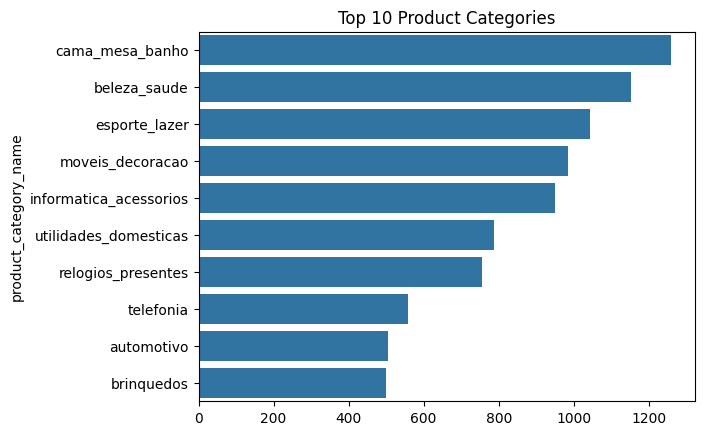

In [ ]:
# Bar chart of top categories
cat_counts = df_cleaned['product_category_name'].value_counts().nlargest(10)
sns.barplot(x=cat_counts.values, y=cat_counts.index)
plt.title('Top 10 Product Categories')
plt.show()

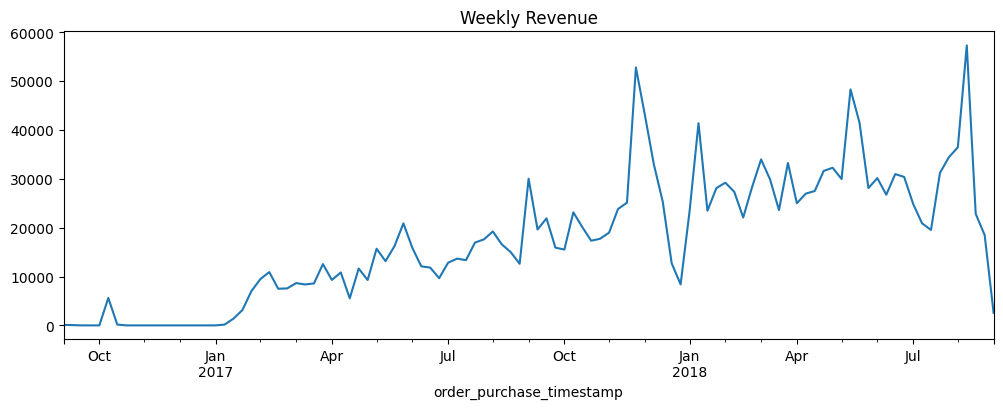

In [ ]:
# Sales trend over time
series = df_cleaned.resample('W', on='order_purchase_timestamp')['revenue'].sum()
series.plot(figsize=(12,4), title='Weekly Revenue')
plt.show()

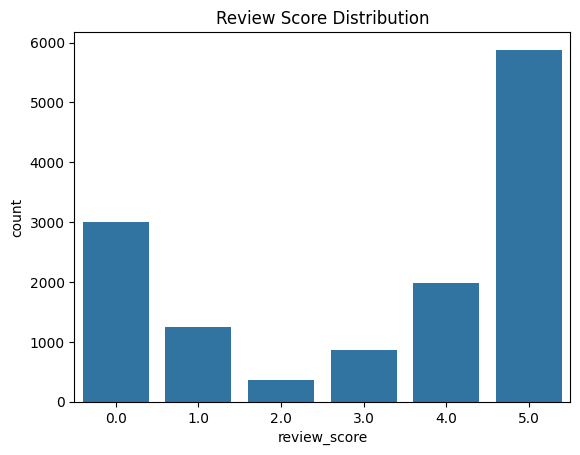

In [ ]:
# Distribution of review scores
df_cleaned.loc[:, 'review_score'] = df_cleaned['review_score'].astype(int)
sns.countplot(x='review_score', data=df_cleaned)
plt.title('Review Score Distribution')
plt.show()

In [ ]:
top_products = df['product_id'].value_counts().head(10)
top_categories = df['product_category_name'].value_counts().head(10)

sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")


Text(0.5, 1.0, 'Top 10 Selling Products')

In [ ]:
top_users = df['customer_unique_id'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index)


<Axes: title={'center': 'Top 10 Selling Products'}, ylabel='product_id'>

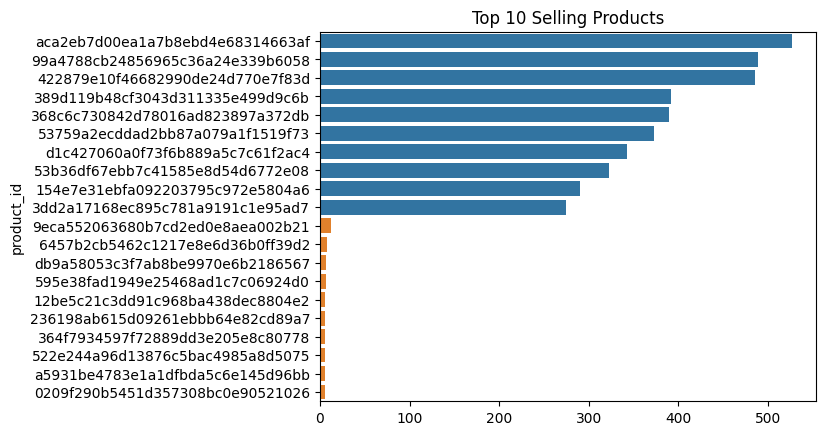

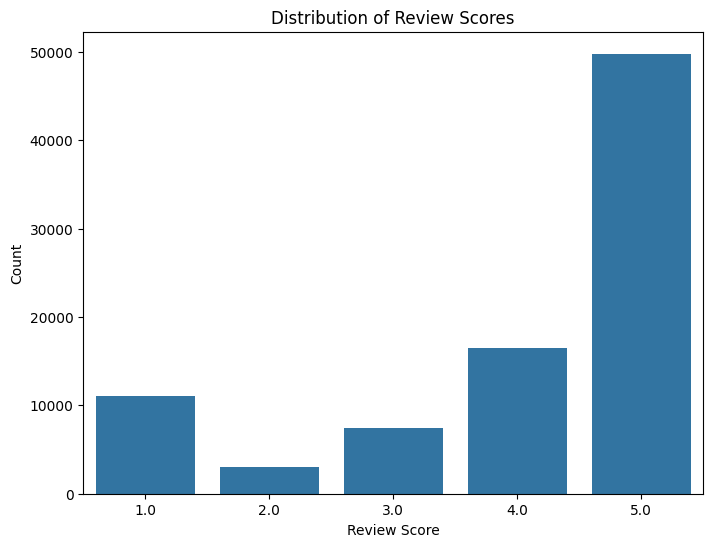

In [ ]:
# Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

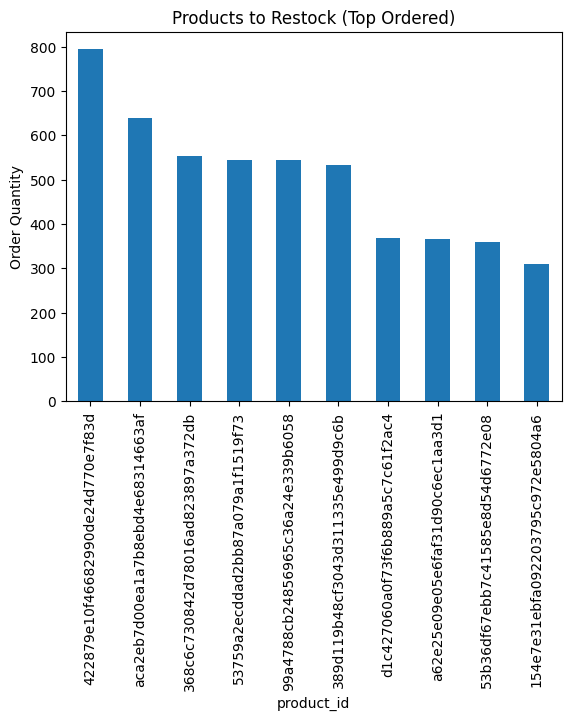

In [ ]:
top_selling = df.groupby('product_id')['order_item_id'].sum().sort_values(ascending=False).head(10)
top_product_names = df[df['product_id'].isin(top_selling.index)][['product_id', 'product_category_name']].drop_duplicates().set_index('product_id')
restock = top_product_names.join(top_selling).sort_values('order_item_id', ascending=False)

restock.plot(kind='bar', y='order_item_id', legend=False)
plt.title("Products to Restock (Top Ordered)")
plt.ylabel("Order Quantity")
plt.show()


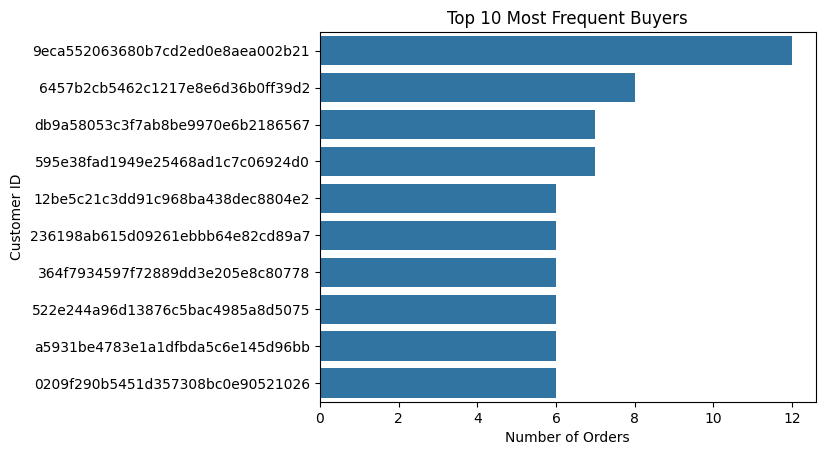

In [ ]:
top_customers = df['customer_unique_id'].value_counts().head(10)
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Most Frequent Buyers")
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.show()


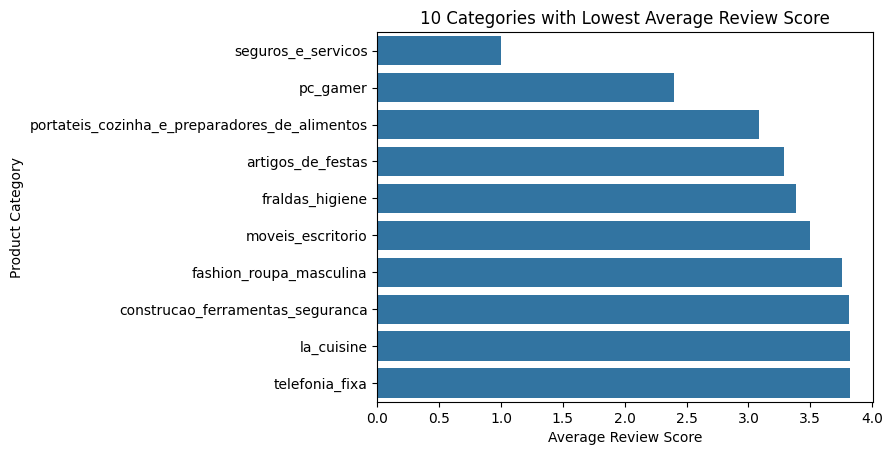

In [ ]:
avg_reviews = df.groupby('product_category_name')['review_score'].mean().sort_values().head(10)
sns.barplot(x=avg_reviews.values, y=avg_reviews.index)
plt.title("10 Categories with Lowest Average Review Score")
plt.xlabel("Average Review Score")
plt.ylabel("Product Category")
plt.show()

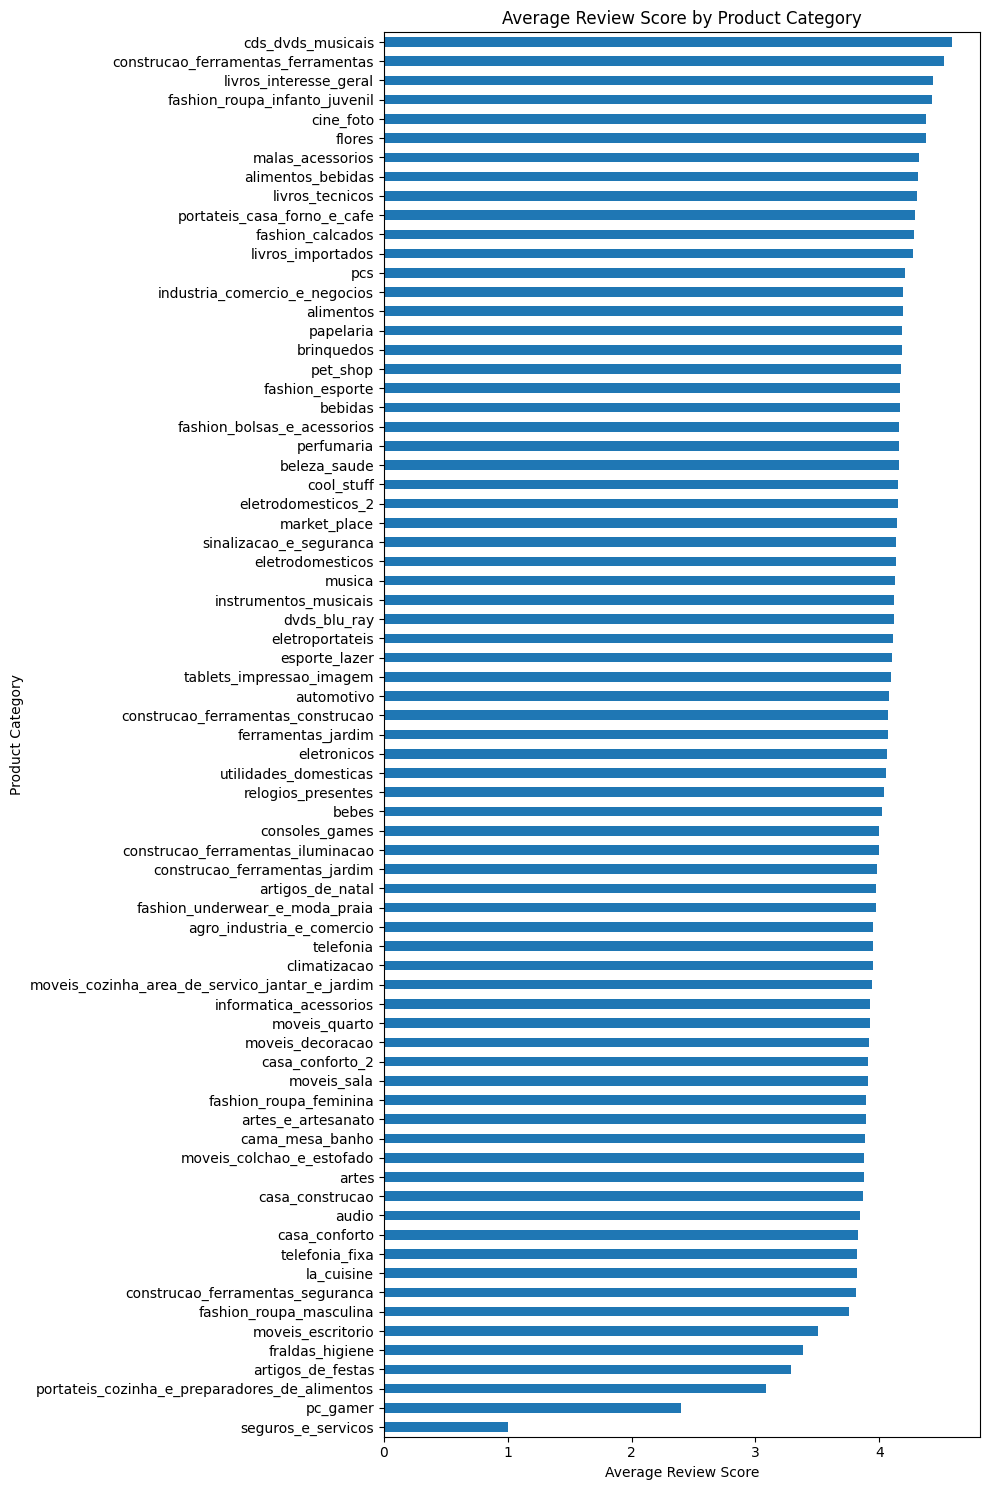

In [ ]:
# Average review score by product category
plt.figure(figsize=(10, 15)) # Adjust figure size for better readability of labels
avg_review_by_cat = df.groupby('product_category_name')['review_score'].mean().sort_values()
avg_review_by_cat.plot(kind='barh')
plt.title('Average Review Score by Product Category')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

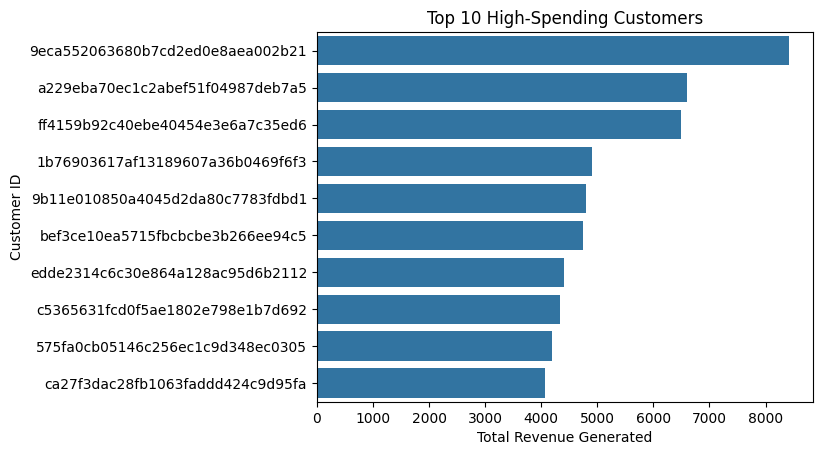

In [ ]:
top_spenders = df.groupby('customer_unique_id')['revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_spenders.values, y=top_spenders.index)
plt.title("Top 10 High-Spending Customers")
plt.xlabel("Total Revenue Generated")
plt.ylabel("Customer ID")
plt.show()


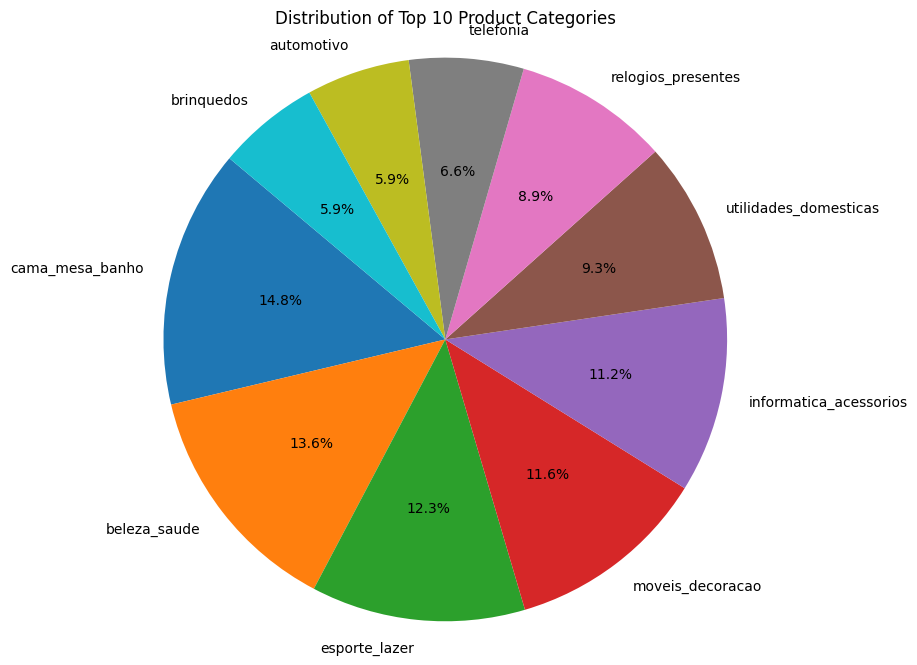

In [ ]:
# Pie chart: Distribution of top 10 product categories
top_categories_distribution = df_cleaned['product_category_name'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_categories_distribution, labels=top_categories_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Product Categories')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

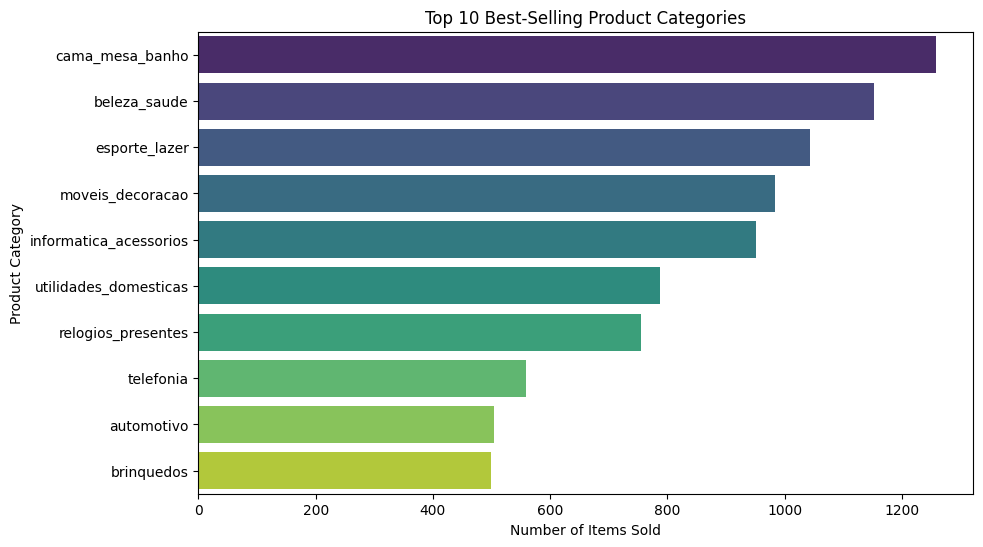

In [ ]:
# Bar chart: Top-selling product categories
top_categories = df_cleaned['product_category_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette='viridis', legend=False)
plt.title('Top 10 Best-Selling Product Categories')
plt.xlabel('Number of Items Sold')
plt.ylabel('Product Category')
plt.show()

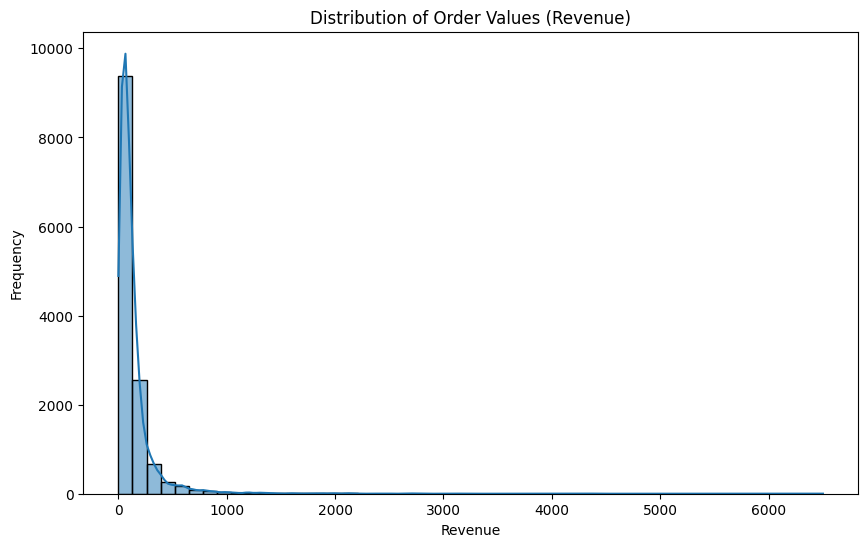

In [ ]:
# Histogram: Distribution of Order Values (Revenue)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['revenue'], bins=50, kde=True)
plt.title('Distribution of Order Values (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

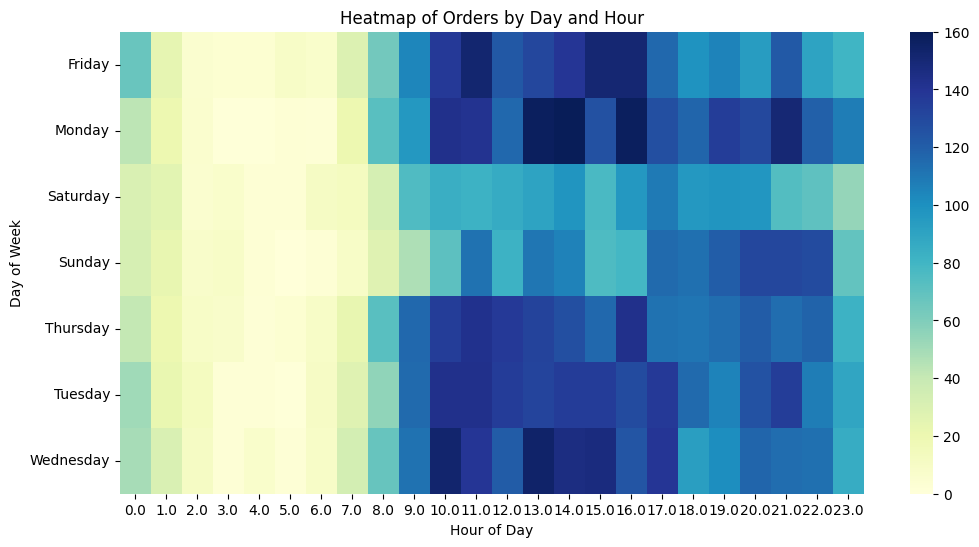

In [ ]:
df['order_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_day'] = df['order_purchase_timestamp'].dt.day_name()

heatmap_data = df.groupby(['order_day', 'order_hour'])['order_id'].count().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Heatmap of Orders by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# **User Segmentation and Business Insights**

In [ ]:
import datetime as dt

# Recalculate RFM metrics
snapshot = df_cleaned['order_purchase_timestamp'].max() + dt.timedelta(days=1)
rfm = df_cleaned.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot - x.max()).days,
    'order_id': 'nunique',
    'revenue': 'sum'
})
rfm.columns = ['Recency','Frequency','Monetary']

print("RFM calculated:")
display(rfm.head())

RFM calculated:


,Recency,Frequency,Monetary
customer_unique_id,,,
00053a61a98854899e70ed204dd4bafe,182,1,573.00
00082cbe03e478190aadbea78542e933,283,1,79.00
000949456b182f53c18b68d6babc79c1,129,1,64.89
00191a9719ef48ebb5860b130347bf33,497,1,47.90
0019e8c501c85848ac0966d45226fa1d,121,1,159.99


In [ ]:
# Define 'Recent buyers' segment (e.g., Recency <= 30 days)
recent_buyers = rfm[rfm['Recency'] <= 30]

print("Recent Buyers:")
display(recent_buyers.head())
print(f"\nNumber of Recent Buyers: {len(recent_buyers)}")

Recent Buyers:


,Recency,Frequency,Monetary
customer_unique_id,,,
00391594070baf8603f5fdc1d0c6a48c,24,1,105.00
003ae409f37c3c30cb1c974af3a42692,14,1,195.00
00504b68faa074d0f40adcb4f7727f71,18,1,241.00
0056c2dd794a5eede6164dcae635875a,21,1,129.99
008b06aba4b5f5b5b94f525ccf520624,7,1,101.97



Number of Recent Buyers: 868


In [ ]:
# Define 'Loyal customers' segment (e.g., Frequency > 1)
loyal_customers = rfm[rfm['Frequency'] > 1]

print("Loyal Customers:")
display(loyal_customers.head())
print(f"\nNumber of Loyal Customers: {len(loyal_customers)}")

Loyal Customers:


,Recency,Frequency,Monetary
customer_unique_id,,,
041caba6a63ace5818387698ea85cdb2,286,2,58.99
08c07c761592a71b85136aa4fe76a6f4,145,2,258.00
12f5d6e1cbf93dafd9dcc19095df0b3d,601,2,20.80
161b2eb506dd664bb5d23dc701a14b59,406,2,258.90
23b2d37ef78f3c8dcb31f5eefc30190a,189,2,32.00



Number of Loyal Customers: 43


In [ ]:
# Define 'High spenders' segment (e.g., top 10% by Monetary value)
high_spenders = rfm[rfm['Monetary'] >= rfm['Monetary'].quantile(0.9)]

print("High Spenders:")
display(high_spenders.head())
print(f"\nNumber of High Spenders: {len(high_spenders)}")

High Spenders:


,Recency,Frequency,Monetary
customer_unique_id,,,
00053a61a98854899e70ed204dd4bafe,182,1,573.00
004df63539fd5e38d4b0a0506de7549c,44,1,949.99
005f060d4223956c62b64e9567a36f0f,99,1,689.00
00da34ebf22b87f6c2f53dc069f237df,104,1,419.40
012755131a5b785b0ae3291c339a9051,158,1,538.47



Number of High Spenders: 1173


# **Conclusion & Reporting**

Based on the exploratory data analysis and user segmentation performed, here is a summary of the key findings and their implications:

### **Business Impact**

The insights derived from this analysis can significantly impact business decisions by:

*   **Optimizing Inventory:** Identifying top-selling products and categories allows for better inventory management, ensuring popular items are well-stocked to meet demand and avoid lost sales.
*   **Improving Marketing Effectiveness:** Understanding peak shopping times and segmenting customers based on RFM scores enables targeted marketing campaigns, leading to higher conversion rates and better return on investment.
*   **Enhancing Customer Satisfaction:** Analyzing review scores helps identify areas for product or service improvement, potentially leading to higher customer satisfaction and positive word-of-mouth.
*   **Driving Revenue Growth:** By focusing on high-value customers and promoting popular products during peak times, the business can drive overall revenue growth.

### **Recommendations**

Based on the analysis, the following recommendations are made:

*   **Products to Stock:** Prioritize stocking products from the top-selling categories identified (e.g., cama_mesa_banho, beleza_saude, esporte_lazer) and the specific top-selling products.
*   **Users to Target:** Implement targeted marketing strategies for the identified user segments:
    *   **Recent Buyers:** Engage with timely follow-up and potentially offer incentives for repeat purchases.
    *   **Loyal Customers:** Reward their loyalty with exclusive discounts, early access to new products, or a loyalty program.
    *   **High Spenders:** Provide premium experiences, personalized recommendations, and potentially a VIP program.
*   **Promotional Timing:** Schedule marketing campaigns and promotions to align with the peak shopping hours and days identified in the heatmap.

### **Limitations**

It's important to acknowledge the limitations of this analysis:

*   **Missing Data:** While we handled missing values, the significant percentage of missing customer and order information in the original dataset might have excluded some valuable data points.
*   **Assumptions:** The RFM segmentation is based on defined thresholds (e.g., top 10% for high spenders), which can be adjusted based on business needs and further analysis.
*   **Data Scope:** The analysis is based on the provided datasets and does not include external factors that might influence sales (e.g., marketing spend, competitor activity, economic conditions).

### **Future Scope**

This analysis can be extended in several ways:

*   **Advanced RFM Segmentation:** Explore more sophisticated RFM segmentation techniques, such as using clustering algorithms to identify more nuanced customer segments.
*   **Product Co-occurrence Analysis:** Analyze frequently bought together items to suggest product bundles and increase average order value.
*   **Churn Prediction:** Build a machine learning model to predict which customers are likely to churn based on their behavior and RFM scores, allowing for proactive retention efforts.
*   **Demand Forecasting:** Utilize time series analysis or machine learning to forecast demand for popular products and categories, further optimizing inventory management.
*   **Geospatial Analysis:** Analyze sales and customer data based on geographical location to identify regional trends and target marketing efforts accordingly.
*   **A/B Testing:** Design and implement A/B tests to measure the effectiveness of different marketing strategies and promotional offers on different customer segments.